In [1]:
#import all necessary packages
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot

In [2]:
os.chdir("C:/Users/vgonsalv/Desktop/DataScience/project")
os.getcwd()

'C:\\Users\\vgonsalv\\Desktop\\DataScience\\project'

In [4]:
Bike_renting=pd.read_csv('day.csv',header=0)

In [5]:
Bike_renting

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
missing_val=pd.DataFrame(Bike_renting.isnull().sum())

In [7]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
Bike_renting.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
#converting categorical  variables to object or factor datatype
for i in range (2,Bike_renting.shape[1]-7):
    Bike_renting.iloc[:,i]=(Bike_renting.iloc[:,i]).astype(object)

{'whiskers': [<matplotlib.lines.Line2D at 0xb0d850>,
 'caps': [<matplotlib.lines.Line2D at 0xb0dc90>,
 'boxes': [<matplotlib.lines.Line2D at 0xb0d5b0>],
 'medians': [<matplotlib.lines.Line2D at 0xb0dff0>],
 'fliers': [<matplotlib.lines.Line2D at 0xfe13f0>],
 'means': []}

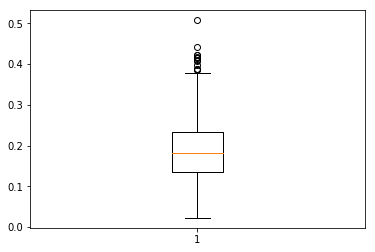

In [11]:
%matplotlib inline
plt.boxplot(Bike_renting['windspeed'])


{'whiskers': [<matplotlib.lines.Line2D at 0x10334b0>,
 'caps': [<matplotlib.lines.Line2D at 0x10338f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1033210>],
 'medians': [<matplotlib.lines.Line2D at 0x1033e30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1033ed0>],
 'means': []}

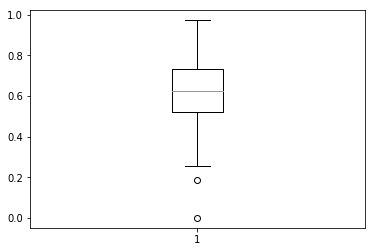

In [12]:
plt.boxplot(Bike_renting['hum'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1067e50>,
 'caps': [<matplotlib.lines.Line2D at 0x106f630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1067f30>],
 'medians': [<matplotlib.lines.Line2D at 0x106fb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x106fd70>],
 'means': []}

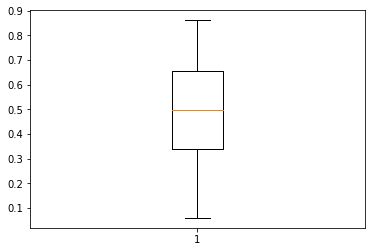

In [13]:
plt.boxplot(Bike_renting['temp'])


{'whiskers': [<matplotlib.lines.Line2D at 0x10ae850>,
 'caps': [<matplotlib.lines.Line2D at 0x10aec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x10ae5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x10aefb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10b73b0>],
 'means': []}

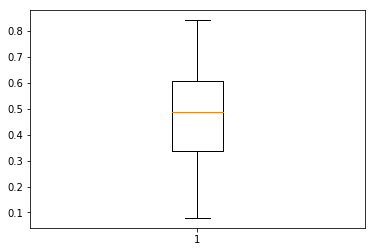

In [14]:
plt.boxplot(Bike_renting['atemp'])

In [15]:
cnames=["windspeed","hum","temp","atemp"]

In [54]:
cnames

['windspeed', 'hum', 'temp', 'atemp']

In [16]:
#delete outlier observations
for i in cnames:
    print(i)
    q75, q25 = np.percentile(Bike_renting.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    Bike_renting = Bike_renting.drop(Bike_renting[Bike_renting.loc[:,i] < min].index)
    Bike_renting = Bike_renting.drop(Bike_renting[Bike_renting.loc[:,i] > max].index)

windspeed
-0.012446750000000034
0.38061125
hum
0.21223837500000003
1.045157375
temp
-0.14125049999999995
1.1354175
atemp
-0.07183400000000006
1.0208940000000002


In [17]:
Bike_renting

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


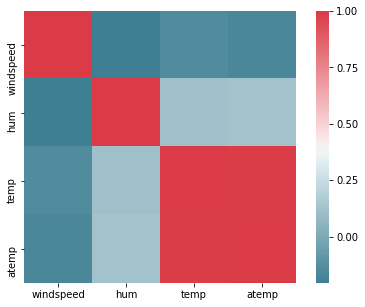

In [18]:
df_corr = Bike_renting.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [19]:
mod = ols('cnt ~ season', data=Bike_renting).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)

In [20]:
aov_table

,sum_sq,df,F,PR(>F)
season,9.218466e+08,3.0,124.840203,5.433284e-65
Residual,1.754981e+09,713.0,NaN,NaN


In [21]:
mod = ols('cnt ~ yr', data=Bike_renting).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
yr,8.813271e+08,1.0,350.959951,5.148657e-64
Residual,1.795501e+09,715.0,NaN,NaN


In [22]:
mod = ols('cnt ~ mnth', data=Bike_renting).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
mnth,1.042307e+09,11.0,40.869727,2.557743e-68
Residual,1.634521e+09,705.0,NaN,NaN


In [23]:
mod = ols('cnt ~ holiday', data=Bike_renting).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
holiday,1.377098e+07,1.0,3.69735,0.054896
Residual,2.663057e+09,715.0,NaN,NaN


In [24]:
mod = ols('cnt ~ weekday', data=Bike_renting).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
weekday,1.757122e+07,6.0,0.781896,0.584261
Residual,2.659257e+09,710.0,NaN,NaN


In [25]:
mod = ols('cnt ~ workingday', data=Bike_renting).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
workingday,8.494340e+06,1.0,2.276122,0.131822
Residual,2.668333e+09,715.0,NaN,NaN


In [26]:
mod = ols('cnt ~ weathersit', data=Bike_renting).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
weathersit,2.679982e+08,2.0,39.718604,4.408358e-17
Residual,2.408830e+09,714.0,NaN,NaN


In [27]:
Bike_renting = Bike_renting.drop(['instant','dteday', 'weekday','atemp','casual','registered'], axis=1)


In [28]:
Bike_renting

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,1,1,0.226957,0.436957,0.186900,1600
5,1,0,1,0,1,1,0.204348,0.518261,0.089565,1606
6,1,0,1,0,1,2,0.196522,0.498696,0.168726,1510
7,1,0,1,0,0,2,0.165000,0.535833,0.266804,959
8,1,0,1,0,0,1,0.138333,0.434167,0.361950,822
9,1,0,1,0,1,1,0.150833,0.482917,0.223267,1321


In [29]:
train_cnt, test_cnt = train_test_split(Bike_renting, test_size=0.2)

In [30]:
######c50#######
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train_cnt.iloc[:,0:9], train_cnt.iloc[:,9])
predictions_DT = fit_DT.predict(test_cnt.iloc[:,0:9])

In [31]:
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

In [32]:
MAPE(test_cnt.iloc[:,9],predictions_DT)

27.903661061469943

In [33]:
RF_model = RandomForestRegressor(n_estimators = 500).fit(train_cnt.iloc[:,0:9], train_cnt.iloc[:,9])
RF_Predictions = RF_model.predict(test_cnt.iloc[:,0:9])

In [34]:
MAPE(test_cnt.iloc[:,9],RF_Predictions)

15.219185603202245

In [35]:
ln_model=sm.OLS(train_cnt.iloc[:,9],train_cnt.iloc[:,0:9].astype(float)).fit()

In [36]:
LN_Predictions = ln_model.predict(test_cnt.iloc[:,0:9])

In [37]:
MAPE(test_cnt.iloc[:,9],LN_Predictions)

18.861589196040615

In [38]:
MAPE(test_cnt.iloc[:,9],RF_Predictions)

15.219185603202245

In [39]:
MAPE(test_cnt.iloc[:,9],predictions_DT)

27.903661061469943

In [40]:
result=pd.DataFrame(test_cnt.iloc[:,0:10])
result['RF_pred_cnt'] = (RF_Predictions)

result.to_csv("Random_forest_output_Python.csv",index=False)